In [102]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/th1-gaussion/Gia SMP va SMPcap 2021(Gi th trng SMP).csv


In [103]:
pip install simdkalman

Note: you may need to restart the kernel to use updated packages.


In [116]:
import numpy as np
import pandas as pd
import simdkalman
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('/kaggle/input/th1-gaussion/Gia SMP va SMPcap 2021(Gi th trng SMP).csv',encoding='ISO-8859-1',delimiter=';')
data2 = np.loadtxt("/kaggle/input/th1-gaussion/Gia SMP va SMPcap 2021(Gi th trng SMP).csv",encoding='latin-1', delimiter=';', skiprows=1, usecols=(13, 14, 15), dtype=float)

In [106]:
feats = ['13', '14','15']

In [107]:
df[feats].head()

,13,14,15
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1010.8,1010.8,1010.8
4,1061.5,1061.5,1061.5


In [108]:
class Random_Variable: 
    
    def __init__(self, name, values, probability_distribution): 
        self.name = name 
        self.values = values 
        self.probability_distribution = probability_distribution 
        if all(type(item) is np.int64 for item in values): 
            self.type = 'numeric'
            self.rv = stats.rv_discrete(name = name, values = (values, probability_distribution))
        elif all(type(item) is str for item in values): 
            self.type = 'symbolic'
            self.rv = stats.rv_discrete(name = name, values = (np.arange(len(values)), probability_distribution))
            self.symbolic_values = values 
        else: 
            self.type = 'undefined'
            
    def sample(self,size): 
        if (self.type =='numeric'): 
            return self.rv.rvs(size=size)
        elif (self.type == 'symbolic'): 
            numeric_samples = self.rv.rvs(size=size)
            mapped_samples = [self.values[x] for x in numeric_samples]
            return mapped_samples 
        
    def probs(self): 
        return self.probability_distribution
    
    def vals(self): 
        print(self.type)
        return self.values 

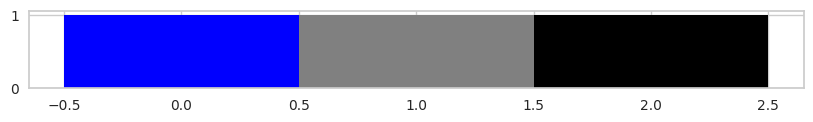

In [109]:
state2color = {
    '13': 'blue',
    '14': 'grey',
    '15': 'black'
}

def plot_weather_samples(samples, state2color):
    colors = [state2color.get(x, 'white') for x in samples]  # Default to 'white' if key is not found
    x = np.arange(0, len(colors))
    y = np.ones(len(colors))
    plt.figure(figsize=(10, 1))
    plt.bar(x, y, color=colors, width=1)
    plt.show()
    
samples = ['13', '14', '15',]

plot_weather_samples(samples, state2color)

## kalman


In [112]:
kf = simdkalman.KalmanFilter(
    state_transition = [[1,1],[0,1]],       
    process_noise = np.diag([0.1, 0.01]), 
    observation_model = np.array([[1,0]]),   
    observation_noise = 1.0)  

In [113]:
x = np.zeros((3, 1)) 

P = np.eye(3)

F = np.eye(3)

H = np.eye(3)

Q = np.eye(3) * 0.01

R = np.eye(3) * 0.1

z = np.zeros((3, 1))

In [114]:
def predict(x, P, F, Q):
    x = np.dot(F, x)
    P = np.dot(F, np.dot(P, F.T)) + Q
    return x, P

def update(x, P, z, H, R):
    y = z - np.dot(H, x)
    S = np.dot(H, np.dot(P, H.T)) + R
    K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))
    x = x + np.dot(K, y)
    P = P - np.dot(K, np.dot(H, P))
    return x, P

In [120]:
filtered_data = []

for measurement in data2:
    z = measurement.reshape(3, 1)

    x, P = predict(x, P, F, Q)

    x, P = update(x, P, z, H, R)

    filtered_data.append(x.flatten())

filtered_data = np.array(filtered_data)

In [121]:
mse_kalman = mean_squared_error(data2, filtered_data)
mae_kalman = mean_absolute_error(data2, filtered_data)
rmse_kalman = np.sqrt(mse_kalman)
r2_kalman = r2_score(data2, filtered_data)

print("MSE:", mse_kalman)
print("MAE:", mae_kalman)
print("RMSE:", rmse_kalman)
print("R2:",r2_kalman)

MSE: 2795.5361200992884
MAE: 32.44273348259217
RMSE: 52.87282969635055
R2: 0.746443729276966


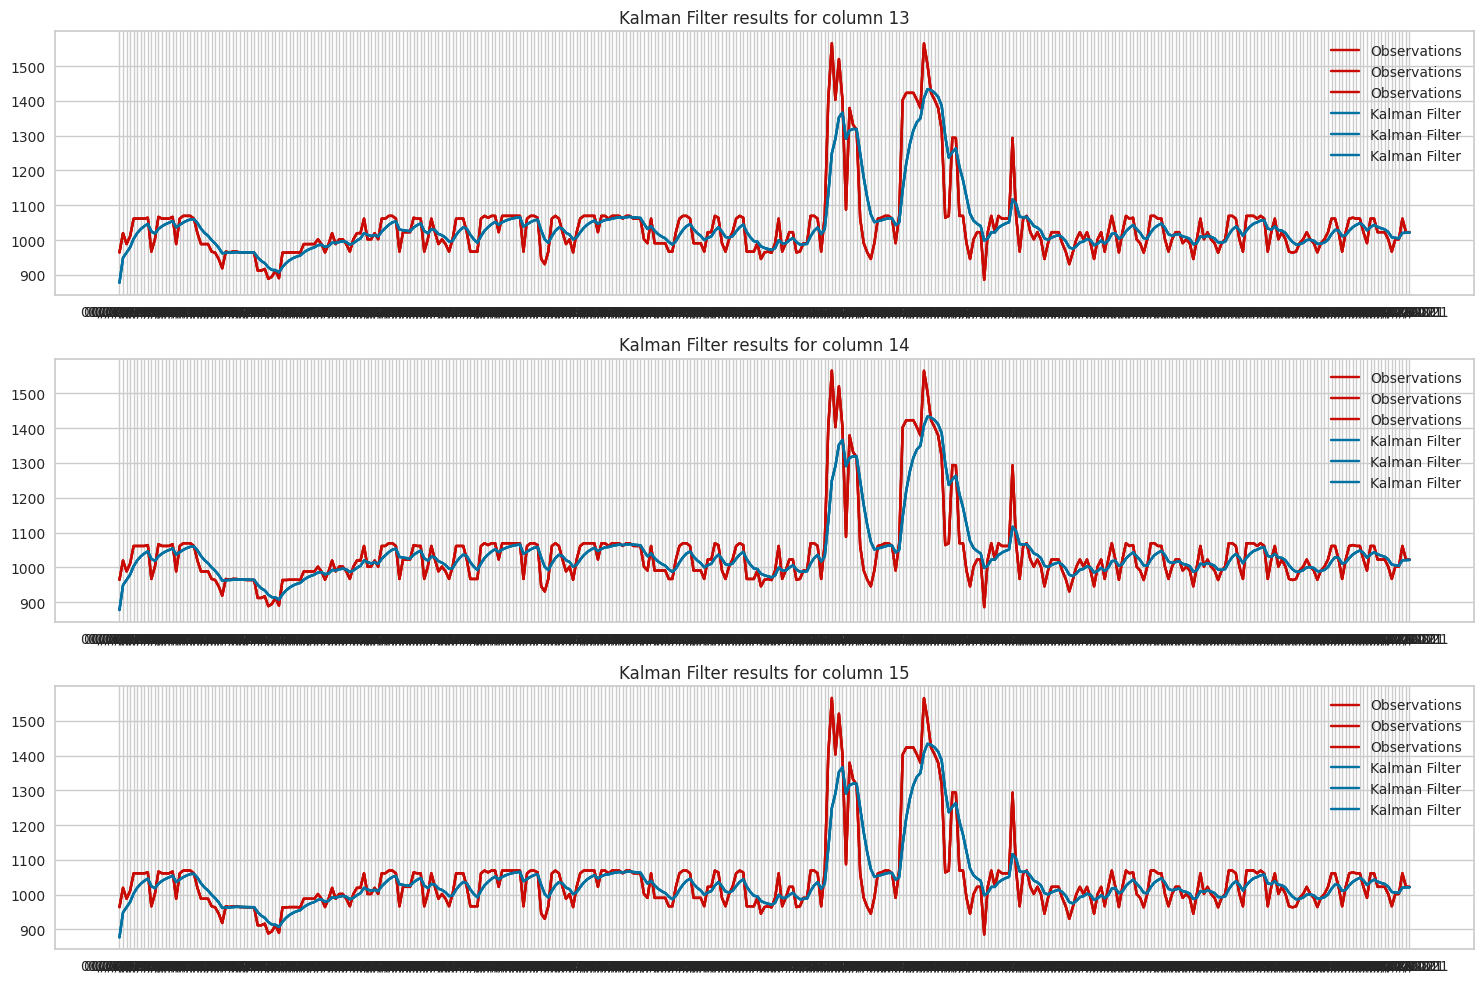

In [123]:
# Plot the results for each column
    plt.figure(figsize=(15, 10))

    for i, col in enumerate(feats):
        plt.subplot(len(feats), 1, i+1)
        plt.plot(df['Ngày'], df[feats], 'r', label='Observations')
        plt.plot(df['Ngày'], filtered_data, 'b', label='Kalman Filter')
        plt.title(f'Kalman Filter results for column {col}')
        plt.legend()

    plt.tight_layout()
    plt.show()


In [125]:
# Khởi tạo HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)

# Huấn luyện HMM với dữ liệu quan sát
model.fit(data2)

# In ra các tham số của mô hình sau khi huấn luyện
print("Start probabilities: ", model.startprob_)
print("Transition matrix: ", model.transmat_)
print("Means: ", model.means_)
print("Covariances: ", model.covars_)


Start probabilities:  [1.00000000e+00 4.61867227e-57]
Transition matrix:  [[0.98533724 0.01466276]
 [0.2173913  0.7826087 ]]
Means:  [[1015.98187134 1015.98421052 1015.99210526]
 [1402.09565189 1402.09565189 1402.09565189]]
Covariances:  [[[1976.25326765    0.            0.        ]
  [   0.         1976.14825927    0.        ]
  [   0.            0.         1976.1901714 ]]

 [[5895.16615279    0.            0.        ]
  [   0.         5895.16615279    0.        ]
  [   0.            0.         5895.16615279]]]


In [126]:
# Dự đoán trạng thái ẩn cho các quan sát hiện có
hidden_states = model.predict(data2)
print("Hidden states: ", hidden_states)

# Lấy mẫu mới từ mô hình đã huấn luyện
X, Z = model.sample(5)  # Lấy mẫu 5 quan sát mới
print("Sampled observations: ", X)
print("Sampled hidden states: ", Z)

Hidden states:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Sampled observations:  [[1069.24593416 1077.00947284 1019.81846739]
 [1026.49361393 1048.14649385  942.62895702]
 [1020.000241   1004.38822045  931.20267259]
 [ 968.43367987  978.13029517 1098.60659593]
 [ 983.59722206  980.88210791 1053.49662

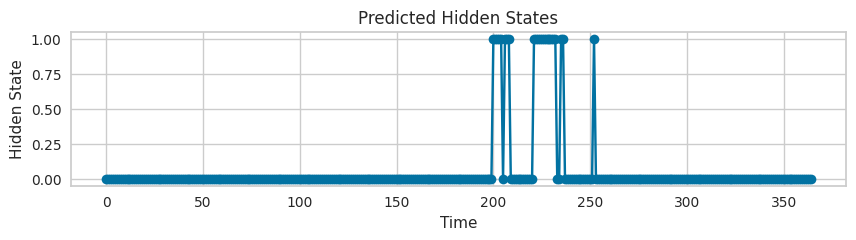

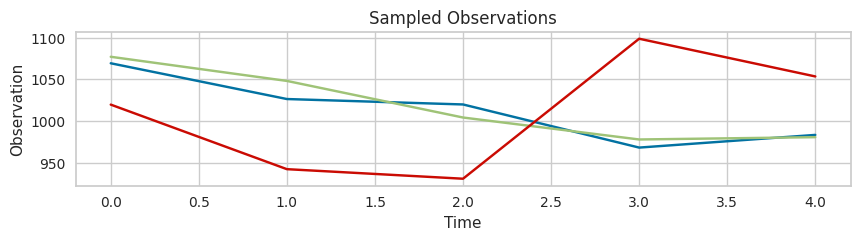

In [127]:
# Vẽ các trạng thái ẩn dự đoán
def plot_hidden_states(hidden_states, title):
    plt.figure(figsize=(10, 2))
    plt.plot(hidden_states, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Hidden State")
    plt.show()

plot_hidden_states(hidden_states, "Predicted Hidden States")

# Vẽ các quan sát mẫu
def plot_observations(observations, title):
    plt.figure(figsize=(10, 2)) 
    plt.plot(observations)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Observation")
    plt.show()

plot_observations(X, "Sampled Observations")